# 홀트계절지수평활법 실습2
월별, 분기별 자료들은 보통 계절변동을 포함(추세\+계절\+자료변동(=level))하는 경우가 많습니다.<br/>
참고로 자료변동은 불규칙에 포함됩니다.<br/>

계절지수평활법 실습2에서는 분기별 데이터인 fpp2 패키지의 austourists를 가지고 실습을 진행해보겠습니다.

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


,Qtr1,Qtr2,Qtr3,Qtr4
2005,42.20566,24.64917,32.66734,37.25735
2006,45.24246,29.35048,36.34421,41.78208
2007,49.27660,31.27540,37.85063,38.83704
2008,51.23690,31.83855,41.32342,42.79900
2009,55.70836,33.40714,42.31664,45.15712
2010,59.57608,34.83733,44.84168,46.97125
2011,60.01903,38.37118,46.97586,50.73380
2012,61.64687,39.29957,52.67121,54.33232
2013,66.83436,40.87119,51.82854,57.49191
2014,65.25147,43.06121,54.76076,59.83447


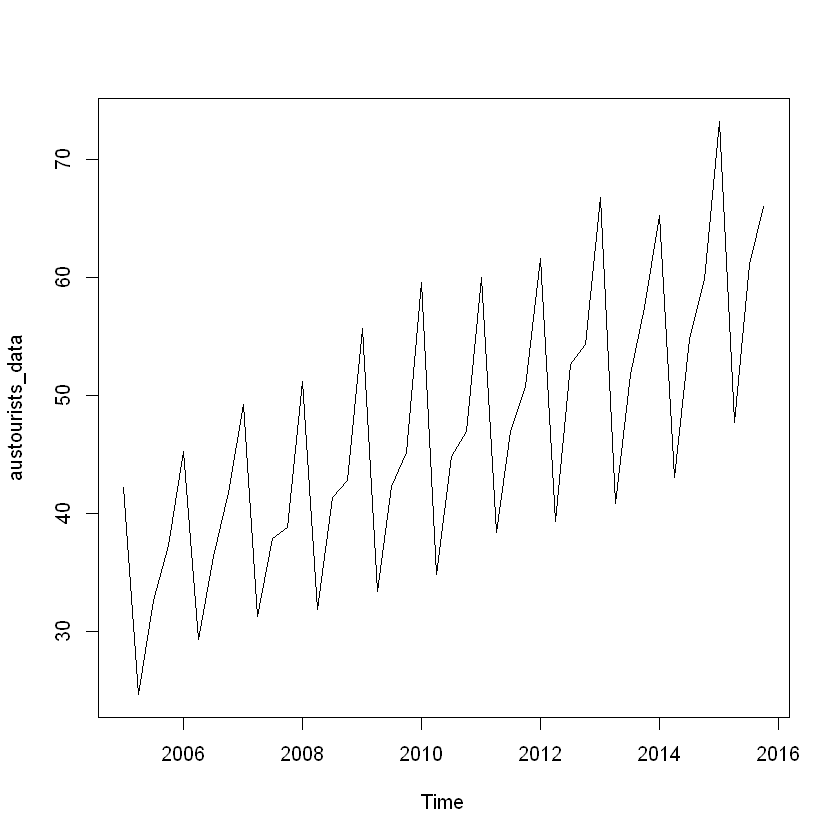

In [1]:
library(fpp2)
library(forecast)

# 원래데이터 확인해보기
#austourists
#plot(austourists)

# 2005년부터 적합시킬 예정, 원데이터 다시 확인하기
austourists_data <- window(austourists, start=2005)
austourists_data
plot(austourists_data)

원래 데이터를 확인해보면 진폭이 미미하게 조금씩 커지고 있어서 승법이 적합하지 않을까 생각하는데, 마찬가지로 가법, 승법 둘다 적용해보고 비교 확인해보겠습니다.<br/>

In [2]:
# 가법_분기데이터이며, h를 8로 설정하여 두 분기를 살펴봅니다
fit1_austourists_ts <- hw(austourists_data, seasonal="additive", h=8)
fit2_austourists_ts <- hw(austourists_data, seasonal="multiplicative", h=8)

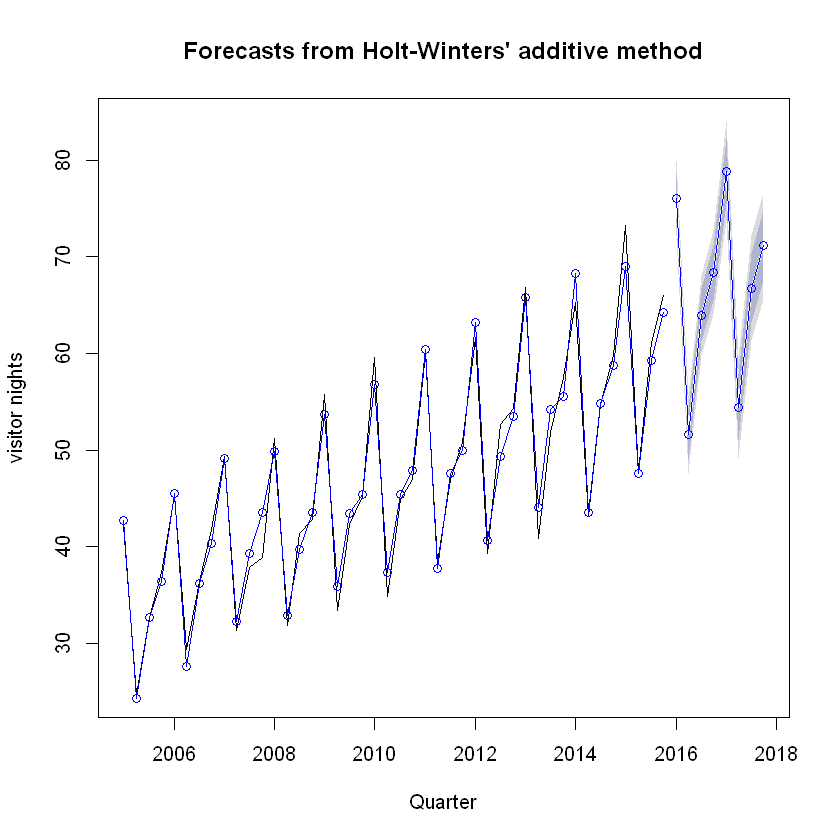

In [3]:
# 가법 plot
plot(fit1_austourists_ts, type="l", ylab="visitor nights", xlab="Quarter", fcol="white", lwd=1)
lines(fitted(fit1_austourists_ts), col="blue", type="o", pch=1, lwd=1)

# 예측값
lines(fit1_austourists_ts$mean, col="blue", type="o", pch=1, lwd=1)

In [4]:
# 적합된 모형 요약
#summary(fit1_austourists_ts)
# 모형 내 전체 속성 확인
names(fit1_austourists_ts)
# 모형의 적합된 값 확인
fit1_austourists_ts$fitted
# 모형의 관측치의 평균점(이를 통한 예측 시도)
fit1_austourists_ts$mean

# 모형의 신뢰수준
fit1_austourists_ts$level
# 모형의 예측구간 하한값
fit1_austourists_ts$lower
# 모형의 예측구간 상한값
fit1_austourists_ts$upper

# 적합된 모델과 원본데이터간 잔차
fit1_austourists_ts$residuals

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

,Qtr1,Qtr2,Qtr3,Qtr4
2005,42.65723,24.21081,32.66618,36.37206
2006,45.53781,27.51872,36.21481,40.33713
2007,49.17134,32.18209,39.31365,43.50887
2008,49.89746,32.85434,39.71474,43.48280
2009,53.65576,35.82730,43.37632,45.34947
2010,56.83932,37.31366,45.42533,47.91400
2011,60.42249,37.71212,47.59100,49.91681
2012,63.19432,40.58637,49.32571,53.47546
2013,65.75739,44.06492,54.19500,55.53369
2014,68.24659,43.48545,54.81621,58.70628


,Qtr1,Qtr2,Qtr3,Qtr4
2016,76.09837,51.60333,63.96867,68.37170
2017,78.90404,54.40899,66.77434,71.17737


[1] 80 95

,80%,95%
2016 Q1,73.60011,72.27761
2016 Q2,48.99039,47.60718
2016 Q3,61.24582,59.80443
2016 Q4,65.54313,64.04578
2017 Q1,75.53440,73.75061
2017 Q2,50.95325,49.12389
2017 Q3,63.23454,61.36069
2017 Q4,67.55541,65.63806


,80%,95%
2016 Q1,78.59664,79.91914
2016 Q2,54.21626,55.59947
2016 Q3,66.69153,68.13292
2016 Q4,71.20027,72.69762
2017 Q1,82.27369,84.05747
2017 Q2,57.86473,59.69409
2017 Q3,70.31414,72.18799
2017 Q4,74.79933,76.71667


,Qtr1,Qtr2,Qtr3,Qtr4
2005,-0.451570185,0.438356556,0.001152203,0.885296117
2006,-0.295347721,1.831764446,0.129395459,1.444950715
2007,0.105257865,-0.906690015,-1.463027869,-4.671827428
2008,1.339443016,-1.015786267,1.608685070,-0.683793235
2009,2.052596198,-2.420151074,-1.059682544,-0.192349430
2010,2.736756621,-2.476330573,-0.583650275,-0.942746503
2011,-0.403461753,0.659063482,-0.615132005,0.816989039
2012,-1.547451237,-1.286800256,3.345500952,0.856852747
2013,1.076967377,-3.193732243,-2.366463781,1.958224763
2014,-2.995120055,-0.424236791,-0.055456268,1.128192171


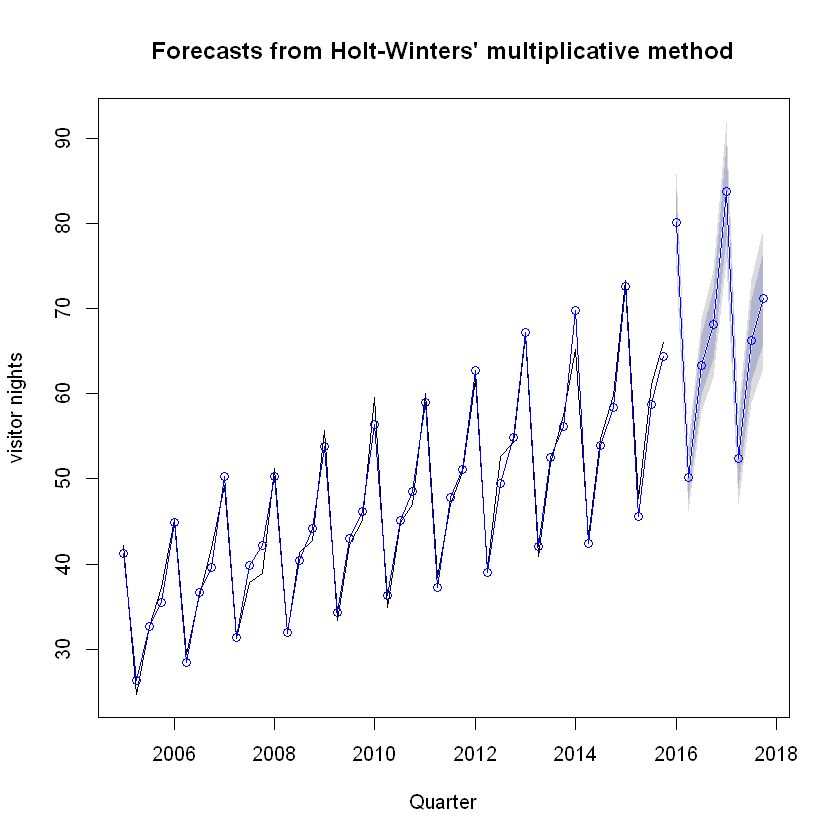

In [5]:
# 승법 plot
plot(fit2_austourists_ts, type="l", ylab="visitor nights", xlab="Quarter", fcol="white", lwd=1)
lines(fitted(fit2_austourists_ts), col="blue", type="o", pch=1, lwd=1)

# 예측값
lines(fit2_austourists_ts$mean, col="blue", type="o", pch=1, lwd=1)

In [6]:
# 적합된 모형 요약
#summary(fit2_austourists_ts)
# 모형 내 전체 속성 확인
names(fit2_austourists_ts)
# 모형의 적합된 값 확인
fit2_austourists_ts$fitted
# 모형의 관측치의 평균점(이를 통한 예측 시도)
fit2_austourists_ts$mean

# 모형의 신뢰수준
fit2_austourists_ts$level
# 모형의 예측구간 하한값
fit2_austourists_ts$lower
# 모형의 예측구간 상한값
fit2_austourists_ts$upper

# 적합된 모델과 원본데이터간 잔차
fit2_austourists_ts$residuals

[1] "model"     "mean"      "level"     "x"         "upper"     "lower"    
 [7] "fitted"    "method"    "series"    "residuals"

,Qtr1,Qtr2,Qtr3,Qtr4
2005,41.28689,26.36042,32.62011,35.43591
2006,44.91855,28.43989,36.70598,39.63640
2007,50.24528,31.40864,39.84476,42.20533
2008,50.30134,31.91456,40.44309,44.16408
2009,53.76967,34.34469,43.00433,46.12632
2010,56.35302,36.28628,45.13587,48.57174
2011,58.97855,37.27806,47.78102,51.14259
2012,62.76659,39.02701,49.48525,54.86171
2013,67.26005,42.02854,52.46503,56.18995
2014,69.83611,42.43956,53.92965,58.43127


,Qtr1,Qtr2,Qtr3,Qtr4
2016,80.08894,50.15482,63.34322,68.17810
2017,83.80112,52.45291,66.21274,71.23205


[1] 80 95

,80%,95%
2016 Q1,76.31865,74.32278
2016 Q2,47.56655,46.19640
2016 Q3,59.80143,57.92652
2016 Q4,64.08399,61.91670
2017 Q1,78.43079,75.58790
2017 Q2,48.88795,47.00077
2017 Q3,61.46194,58.94702
2017 Q4,65.85721,63.01194


,80%,95%
2016 Q1,83.85922,85.85509
2016 Q2,52.74309,54.11324
2016 Q3,66.88502,68.75993
2016 Q4,72.27221,74.43950
2017 Q1,89.17146,92.01434
2017 Q2,56.01787,57.90504
2017 Q3,70.96353,73.47845
2017 Q4,76.60690,79.45217


,Qtr1,Qtr2,Qtr3,Qtr4
2005,0.022253395,-0.064917259,0.001447598,0.051401220
2006,0.007211138,0.032017984,-0.009855996,0.054134228
2007,-0.019279127,-0.004242035,-0.050047701,-0.079807155
2008,0.018599126,-0.002381513,0.021767142,-0.030909144
2009,0.036055521,-0.027298228,-0.015991149,-0.021011845
2010,0.057194029,-0.039930977,-0.006517815,-0.032951059
2011,0.017641623,0.029323424,-0.016850934,-0.007993262
2012,-0.017839416,0.006983799,0.064382034,-0.009649593
2013,-0.006329087,-0.027537175,-0.012131872,0.023170613
2014,-0.065648555,0.014647967,0.015410982,0.024014582


적합된 모형의 mean속성을 통하여 예측값을 확인해보았을 때 가법의 경우에는 순서대로 76.10, 51.60, 63.97, 68.37, 78.90, 54.41, 66.77, 71.18의 값을 얻었으며, 승법의 경우에는 80.09, 50.15, 63.34, 68.18, 83.80, 52.45, 66.21, 71.23의 값을 얻었습니다.<br/>

이 값들은 말 그대로 모형의 신뢰수준을 나타내는 정규분포의 평균값이며, 모델이 얼마나 잘 적합되었는가, 표준 편차가 어떻게 되는가 (h값도 연관되긴 함)에 영향을 받아 신뢰구간은 결정되었을 것입니다.<br/>
신뢰구간의 하한값과 상한값 역시 확인 차 출력해보았습니다.<br/>

하지만 이것으로 가법|승법 모형이 이 데이터에 더 적합했다고 평가하긴 어렵습니다. <br/>
평가를 위해선 어떤 측도가 필요한데요, 각 잔차값들을 출력해보았으나 한 눈에 보기 어렵죠 아무래도!<br/>

그래서 이번 실습에서도 두 모형을 모두 요약해봄으로써 역시 잔차 평가 측도인 RMSE 값을 확인해보았습니다.<br/>

In [7]:
# 적합된 가법 모형 요약
summary(fit1_austourists_ts)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = austourists_data, h = 8, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.3063 
    beta  = 1e-04 
    gamma = 0.4263 

  Initial states:
    l = 32.2597 
    b = 0.7014 
    s = 1.3106 -1.6935 -9.3132 9.6962

  sigma:  1.9494

     AIC     AICc      BIC 
234.4171 239.7112 250.4748 

Error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.008115785 1.763305 1.374062 -0.2860248 2.973922 0.4502579
                    ACF1
Training set -0.06272507

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       76.09837 73.60011 78.59664 72.27761 79.91914
2016 Q2       51.60333 48.99039 54.21626 47.60718 55.59947
2016 Q3       63.96867 61.24582 66.69153 59.80443 68.13292
2016 Q4       68.37170 65.54313 71.20027 64.04578 72.69762
2017 Q1       78.90404 75.53440 82.27369 73.75061 84.05747
2017 Q2  

In [8]:
# 적합된 승법 모형 요약
summary(fit2_austourists_ts)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = austourists_data, h = 8, seasonal = "multiplicative") 

  Smoothing parameters:
    alpha = 0.4406 
    beta  = 0.0134 
    gamma = 0.0023 

  Initial states:
    l = 32.4875 
    b = 0.6974 
    s = 1.0237 0.9618 0.7704 1.2442

  sigma:  0.0367

     AIC     AICc      BIC 
221.1313 226.4254 237.1890 

Error measures:
                     ME     RMSE     MAE           MPE    MAPE      MASE
Training set 0.09206228 1.575631 1.25496 -0.0006505533 2.70539 0.4112302
                    ACF1
Training set -0.07955726

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2016 Q1       80.08894 76.31865 83.85922 74.32278 85.85509
2016 Q2       50.15482 47.56655 52.74309 46.19640 54.11324
2016 Q3       63.34322 59.80143 66.88502 57.92652 68.75993
2016 Q4       68.17810 64.08399 72.27221 61.91670 74.43950
2017 Q1       83.80112 78.43079 89.17146 75.58790 9

결과를 보면 가법모형의 RMSE는 1.76, 승법모형의 RMSE는 1.58로 승법모형의 잔차가 더 적네요!<br/>
그렇다면 이 데이터는 홀트의 계절지수평활의 **승법적 모형**을 적용시키기에 보다 적합하다 말할 수 있겠습니다.<br/>